## Nama: : Jessica Theresia
## Email: : me.jessicatheresia@gmail.com
## ID Dicoding: : jessica_trs

## Environtment Setup

In [1]:
# !pip install --upgrade --force-reinstall numpy pandas scikit-learn gensim

In [2]:
!pip install Sastrawi

In [3]:
!pip install emoji

In [4]:
!pip install gensim

# 1. Import Library

In [5]:
from google.colab import drive, files
import os
import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import emoji
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout, Bidirectional, Flatten, LSTM
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam
import joblib
from IPython.display import display
from keras.models import load_model

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# 2. Memuat Dataset

Dataset yang digunakan adalah dataset scrapping berupa review aplikasi Whatsapp dari Playstore

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Dicoding ML Submission/Belajar Pengembang ML/dataset_latih_scraping.csv")

df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fd8c9a78-77f1-414b-93ff-20f64ed0e9dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tidak relavan,2,0,2.25.9.78,2025-04-07 03:06:31,NaN,NaN,2.25.9.78
1,8101a727-21e3-49e6-89f9-db14ab0082cb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,knp whatsapp sy selalu di anggap spam ya..moho...,5,0,2.25.9.78,2025-04-07 00:53:06,NaN,NaN,2.25.9.78
2,7b779ca3-e76a-41e9-ad99-0f8db8f185ea,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,nice Thanks,4,0,2.25.8.84,2025-04-06 21:36:08,NaN,NaN,2.25.8.84
3,bf608698-5be7-45e6-8484-85a17138e9e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,muad siti,5,0,2.24.23.78,2025-04-06 17:52:03,NaN,NaN,2.24.23.78
4,54ecb959-090b-45fb-a491-103927c840f1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,5,0,2.25.9.78,2025-04-06 16:39:51,NaN,NaN,2.25.9.78


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              15000 non-null  object 
 1   userName              15000 non-null  object 
 2   userImage             15000 non-null  object 
 3   content               15000 non-null  object 
 4   score                 15000 non-null  int64  
 5   thumbsUpCount         15000 non-null  int64  
 6   reviewCreatedVersion  12162 non-null  object 
 7   at                    15000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            12162 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.3+ MB


In [10]:
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,2838
at,0
replyContent,15000
repliedAt,15000


In [11]:
clean_df = df.copy()

In [12]:
clean_df = clean_df.drop(columns=['userImage', 'replyContent', 'repliedAt'])
clean_df = clean_df.drop_duplicates(subset='content')
clean_df = clean_df.dropna(subset=['content', 'score'])

In [13]:
# Reset index setelah pembersihan
clean_df = clean_df.reset_index(drop=True)

print(f"Jumlah data akhir: {clean_df.shape[0]} baris dan {clean_df.shape[1]} kolom")
clean_df.head()

Jumlah data akhir: 11393 baris dan 8 kolom


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,fd8c9a78-77f1-414b-93ff-20f64ed0e9dd,Pengguna Google,tidak relavan,2,0,2.25.9.78,2025-04-07 03:06:31,2.25.9.78
1,8101a727-21e3-49e6-89f9-db14ab0082cb,Pengguna Google,knp whatsapp sy selalu di anggap spam ya..moho...,5,0,2.25.9.78,2025-04-07 00:53:06,2.25.9.78
2,7b779ca3-e76a-41e9-ad99-0f8db8f185ea,Pengguna Google,nice Thanks,4,0,2.25.8.84,2025-04-06 21:36:08,2.25.8.84
3,bf608698-5be7-45e6-8484-85a17138e9e3,Pengguna Google,muad siti,5,0,2.24.23.78,2025-04-06 17:52:03,2.24.23.78
4,54ecb959-090b-45fb-a491-103927c840f1,Pengguna Google,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,5,0,2.25.9.78,2025-04-06 16:39:51,2.25.9.78


# 3. Preprocessing Text

In [14]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = emoji.replace_emoji(text, replace='')
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

In [15]:
def casefoldingText(text):
     text = text.lower()
     return text

In [16]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "bisa": "dapat", "bags": "bagus", "bgs": "bagus",
    "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "+": "baik", "-": "buruk","kaga":"tidak",
    "ga": "tidak", "gak": "tidak", "gk": "tidak", "nggak": "tidak", "enggak": "tidak","woke":"oke","terhapus":"hilang",
    "yaa": "ya", "aku": "saya", "ku": "saya", "lu": "kamu", "loe": "kamu", "gue": "saya","aq":"saya","sy":"saya",
    "guys": "teman - teman", "kamu": "anda", "gila": "hebat", "ges": "teman - teman","koq":"kok","gbisa":"tidak bisa",
    "gw": "saya", "begete": "banget", "gampang": "mudah", "seru": "asik", "lop": "suka","gbs":"tidak bisa",
    "tp": "tapi", "tpi": "tapi", "gg": "keren", "trs": "terus", "donlod": "unduh", "mls": "males","skrng":"sekarang",
    "yng": "yang", "yg": "yang", "lg": "lagi", "dpt": "dapat", "krg": "kurang","hdeh":"aduh","sw":"story whatsapp",
    "anjir": "anjir", "anjay": "anjay", "sukak": "suka", "mantap": "hebat", "q": "saya","senenh":"senang","mantep":"mantap",
    "bjier": "astaga", "bosen": "bosan", "rekomen": "rekomendasi", "gwe": "saya","knp":"kenapa","sllu":"selalu",
    "ttp": "tetap", "aj": "aja", "/": "atau", "menyala": "keren", "bet": "banget","ngasih":"beri","blm":"belum",
    "btw": "ngomong-ngomong", "gegara": "karena", "pakek": "pakai", "B aja": "biasa", "mayan": "lumayan", "cuan": "untung",
    "gud": "good", "klau": "jika", "mantul": "keren", "happy": "senang", "plis": "tolong","kg":"tidak","mantul":"mantap betul",
    "app": "aplikasi", "apk": "aplikasi", "udah": "sudah", "kalo": "kalau", "ngirim": "kirim", "gabisa": "tidak bisa",
    "wa": "whatsapp", "bikin": "buat", "banget": "sangat", "makin": "semakin", "kena": "terkena","sucses":"sukses",
    "kasih": "beri", "mau": "ingin", "aja": "saja", "vidio": "video", "ajg": "anjing", "ngmg": "ngomong",
    "sm": "sama", "mo": "mau", "km": "kamu", "kmrn": "kemarin", "dlu": "dulu", "nnti": "nanti", "ntr": "nanti",
    "klo": "kalau", "kl": "kalau", "bsk": "besok", "dr": "dari", "td": "tadi", "skrg": "sekarang", "skrg2": "sekarang",
    "jgn": "jangan", "bkn": "bukan", "knp": "kenapa", "knpa": "kenapa", "nyoba": "mencoba", "nyesel": "menyesal", "pgn": "ingin",
    "pdhl": "padahal", "pke": "pakai", "pny": "punya", "uda": "sudah", "udh": "sudah", "udaahh": "sudah",
    "bgmn": "bagaimana", "bgm": "bagaimana", "gmn":"bagaiamana","bgtu": "begitu","gajelas":"tidak jelas"
}


def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)
def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)

In [17]:
# Hapus lebih dari 2 huruf berdekatan
def remove_double_letters(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [18]:
# Menangani Typo
def correct_typos_and_slang(text):
    text = remove_double_letters(text)
    text = fix_slangwords(text)
    text = casefoldingText(text)

    return text

In [19]:
def DoubleMeans_Text(text):
    # Ubah pola seperti kata^2 menjadi kata kata
    text = re.sub(r'(\w+)\^2', r'\1 \1', text)
    return text

In [20]:
# Tokenisasi
def tokenizingText(text):
    return word_tokenize(text)

In [21]:
# Stopword removal
def filteringText(tokens, level="default"):
    stopwords_ind = set(stopwords.words('indonesian'))
    stopwords_eng = set(stopwords.words('english'))

    tambahan_default = {
    "ada", "agar", "apa", "atau", "dan", "dari", "dengan", "di", "ini", "itu", "jadi", "juga",
    "karena", "ke", "lagi", "maupun", "namun", "oleh", "pada", "saat", "sama", "sebagai",
    "selalu", "semua", "sudah", "terus", "untuk", "ya", "yang"}

    tambahan_agresif = tambahan_default.union({'bezir', 'bezier', 'bejir','wanjay','wow','wew','woah','wah'})
    if level == "aggressive":
        all_stopwords = stopwords_ind.union(stopwords_eng).union(tambahan_agresif)
    else:
        all_stopwords = stopwords_ind.union(stopwords_eng).union(tambahan_default)
    return [word for word in tokens if word not in all_stopwords]

In [22]:
# Stemming Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text):
    words = text.split()
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

In [23]:
# Konvert token list menjadi kalimat
def toSentence(tokens):
    if isinstance(tokens, list):
        return ' '.join(tokens)
    else:
        return ''

In [24]:
# Pipeline penerapan preprocessing
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_corrected'] = clean_df['text_clean'].apply(correct_typos_and_slang)
clean_df['text_DoubleMeans'] = clean_df['text_corrected'].apply(DoubleMeans_Text)
clean_df['text_token'] = clean_df['text_DoubleMeans'].apply(tokenizingText)
clean_df['text_nostop'] = clean_df['text_token'].apply(filteringText)
clean_df['text_sentence'] = clean_df['text_nostop'].apply(toSentence)
clean_df['text_final'] = clean_df['text_sentence'].apply(stemmingText)

clean_df[['content', 'text_final']].head(15)

,content,text_final
0,tidak relavan,relavan
1,knp whatsapp sy selalu di anggap spam ya..moho...,whatsap angap spam yamohon bantu donk
2,nice Thanks,nice thanks
3,muad siti,muad siti
4,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,
5,mana ini?? padahal udah di update tapi msih ng...,update msih nga muncul fitur musik status ni w...
6,Aplikasinya Mantap Sekali 😍,aplikasi hebat
7,aku,
8,gacorr 🔥🔥🔥🔥,gacor
9,Bagaimana cara masuk wa ini dgn no hp saya kok...,masuk whatsapp dgn hp terima bantuanya


# 4. Pelabelan

In [25]:
positive_words = [
    "bagus", "baik", "cepat", "good", "mantap", "membantu", "mudah", "ok banget", "oke banget", "suka", "top",'nice',"membantu","sukses","serba bisa","canggih","amazing","sukses","berfungsi",
    "keren", "suka", "seru", "menarik", "hebat", "asik", "favorit", "berkualitas", "best", "tidak bosan", "puas", "mudah","oke","manfaat","mantap betul","sip","istimewa","like","sangat bantu",
    "luar biasa", "nyaman", "senang", "aman", "suka banget", "super", "mantep", "rekommendasi", "rekomended","helpful","Good","lebih cepat","hebat","enak"]

negative_words = [
    "bug", "buruk", "error", "gabisa", "gagal", "hilang", "jelek", "kenapa", "lemot", "benci", "bosan", "payah", "worse","tidak muncul","keluar sendiri","uninstall",
    "tidak suka", "parah", "kecewa", "aneh banget", "tidak jelas", "tidak banget", "masalah", "ngelag", "spam", "kacau","tidak dukung","buram","pecah","tidak berguna",
    "terhapus", "tidak", "sebal", "aneh", "marah", "rusak", "susah", "ribet", "sulit", "tolol", "ngaco", "tidak bisa","belum bisa","error","lelet","stuck",
    "tidak puas", "bingung","hilang","loading lama","blokir","tidak jelas","tidak bagus","kesal","delay", "lambat","kurang","susah","kurang"]

In [26]:
# Rule-based kata bermakna ganda: pakai token
def label_sentimen(tokens):
    kata_kasar = ["anjing", "babi", "bangsad"]
    kata_negatif_pendukung = ["dasar", "parah", "tolol", "kecewa", "banget", "lo", "lu", "dia","aplikasi","koin"] #termasuk kata yang berhubungan dengan isi aplikasi

    if any(kasar in tokens for kasar in kata_kasar):
        if any(neg_word in tokens for neg_word in kata_negatif_pendukung):
            return "negatif"
        else:
            return "netral"
    return None

In [27]:
# Keyword-based: pakai kalimat hasil stemming
def label_sentiment_by_keywords(text):
    pos_count = sum(1 for word in text.split() if word in positive_words)
    neg_count = sum(1 for word in text.split() if word in negative_words)

    if pos_count > neg_count:
        return 'positif'
    elif neg_count > pos_count:
        return 'negatif'
    elif pos_count == 0 and neg_count == 0:
        return 'netral'
    else:
        return 'netral'

In [28]:
def combined_labeling(row):
    rule_label = label_sentimen(row['text_nostop'])  # pakai token
    if rule_label is not None:
        return rule_label
    return label_sentiment_by_keywords(row['text_final'])  # pakai kalimat

In [29]:
clean_df['label'] = clean_df.apply(combined_labeling, axis=1)
clean_df[['content', 'text_final', 'label']].head()

,content,text_final,label
0,tidak relavan,relavan,netral
1,knp whatsapp sy selalu di anggap spam ya..moho...,whatsap angap spam yamohon bantu donk,negatif
2,nice Thanks,nice thanks,positif
3,muad siti,muad siti,netral
4,👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍,,netral


In [30]:
# Simpan text hasil preprosesing
clean_df['text_final'].to_csv('/content/drive/MyDrive/Dicoding ML Submission/Belajar Pengembang ML/clean_dataset_preprocessed.csv', index=False)

# 5. Eksplorasi Label

In [31]:
# Distribusi Label
print("\nDistribusi label:")
print(clean_df['label'].value_counts())

print("\nDistribusi label (persentase):")
print(clean_df['label'].value_counts(normalize=True) * 100)


Distribusi label:
label
netral     6548
positif    2899
negatif    1946
Name: count, dtype: int64

Distribusi label (persentase):
label
netral     57.473887
positif    25.445449
negatif    17.080664
Name: proportion, dtype: float64


<ipython-input-32-9e2e99b8dc36>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=clean_df, palette='viridis')


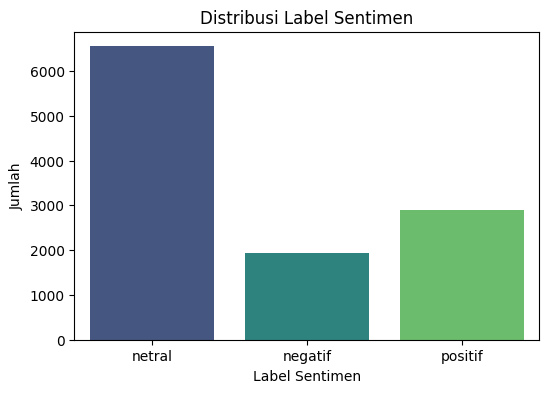

In [32]:
# Visualisasi Distribusi Label
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=clean_df, palette='viridis')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [33]:
# Contoh Kalimat Tiap Label
for label in ['positif', 'netral', 'negatif']:
    print(f"\nContoh kalimat dengan label '{label}':")
    sample_texts = clean_df[clean_df['label'] == label]['content'].head(3)
    for i, text in enumerate(sample_texts, 1):
        print(f"{i}. {text}")


Contoh kalimat dengan label 'positif':
1. nice Thanks
2. Aplikasinya Mantap Sekali 😍
3. Bagus

Contoh kalimat dengan label 'netral':
1. tidak relavan
2. muad siti
3. 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍 👍🙏 🙏👍

Contoh kalimat dengan label 'negatif':
1. knp whatsapp sy selalu di anggap spam ya..mohon dibantu donk
2. hdeh bingung gua sama WhatsApp, kenapa ya padahal kita ga lakuin apa' tiba-tiba wak kena kenon permanen dan gbsa, makin bingung sama WhatsApp sekarang
3. chat saya sudah di cadangkan tapi begitu dipindahkan tidak ada pencadangan di email tersebut jadi hilang semua chat nya satt kan aneh sialan


In [34]:
# Statistik Panjang Kalimat per Label
clean_df['text_length'] = clean_df['text_final'].apply(lambda x: len(x.split()))
print(clean_df.groupby('label')['text_length'].describe())

          count      mean       std  min  25%  50%   75%   max
label                                                         
negatif  1946.0  9.423433  7.404685  1.0  4.0  7.0  12.0  57.0
netral   6548.0  5.647526  5.250390  0.0  2.0  4.0   8.0  85.0
positif  2899.0  7.147637  7.413937  1.0  2.0  4.0  10.0  59.0


# 6. Persiapan Modelling

Encoding

In [35]:
# Encoding Label
label_encoders = {}

target_column = 'label'
le = LabelEncoder()
clean_df[target_column] = le.fit_transform(clean_df[target_column])
label_encoders[target_column] = le

X = clean_df['text_final']
y_encoded = clean_df[target_column]
y_categorical = to_categorical(y_encoded)

# Mapping label
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping Label:")
for label, encoded in label_mapping.items():
    print(f"  '{label}' → {encoded}")

Mapping Label:
  'negatif' → 0
  'netral' → 1
  'positif' → 2


Oversampling untuk model CNN

In [36]:
# Oversampling untuk balancing
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.to_frame(), y_encoded)

X_balanced = X_resampled['text_final']
y_balanced = to_categorical(y_resampled)

Ekstraksi Fitur dengan Word2Vec

In [37]:
# Tokenisasi untuk Word2Vec (jadi list of tokens)
X_tokens = X_balanced.apply(lambda x: x.split())

w2v_model = Word2Vec(
    sentences=X_tokens,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=0  # CBOW
)

In [38]:
# Embedding matrix
vocab = w2v_model.wv.key_to_index
vocab_size = len(vocab) + 1
embedding_matrix = np.zeros((vocab_size, 100))

word_index = {}
for i, word in enumerate(vocab):
    word_index[word] = i + 1
    embedding_matrix[i + 1] = w2v_model.wv[word]

In [39]:
# Konvert token ke indeks
X_sequences = []
for tokens in X_tokens:
    seq = [word_index.get(token, 0) for token in tokens]
    X_sequences.append(seq)

In [40]:
# Padding
max_len = max([len(seq) for seq in X_sequences])
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# 7. Model


### BiLSTM

Bidirectional Long Short-Term Memory (BiLSTM) merupakan pengembangan dari arsitektur LSTM yang mampu memproses data sekuensial dalam dua arah, yaitu dari awal ke akhir (forward) dan dari akhir ke awal (backward). Dalam konteks pemrosesan bahasa alami (NLP), BiLSTM digunakan untuk memahami konteks kata secara lebih komprehensif dengan mempertimbangkan kata-kata sebelumnya dan sesudahnya dalam suatu kalimat. Hal ini sangat penting karena makna suatu kata dalam bahasa sering kali bergantung pada konteks sekitarnya.

Dengan kemampuan dua arah tersebut, BiLSTM sangat efektif digunakan dalam berbagai tugas NLP seperti analisis sentimen, named entity recognition (NER), part-of-speech tagging, dan text classification.

####Skema Model 1 :
* Algoritma Pelatihan: Biddirectional LSTM
* Ekstraksi Fitur: Word2Vec - CBOW
* Pembagian Data: 80/20
* Label Kelas: Tetap 3 kelas (positif, netral, negatif)
* Target Akurasi: ≥ 92% di training & testing

Split Dataset

In [41]:
# Split data train/test
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_padded, y_balanced, test_size=0.2, random_state=42, stratify=y_resampled)

Pembuatan Model BiLSTM - Word2Vec

In [42]:
#Word2Vec Model
model_bi_lstm_word2vec = Sequential()

model_bi_lstm_word2vec.add(Embedding(
    input_dim=vocab_size,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=True))

# Bidirectional LSTM layer
model_bi_lstm_word2vec.add(Bidirectional(LSTM(128)))
model_bi_lstm_word2vec.add(Dropout(0.3))
model_bi_lstm_word2vec.add(Dense(64, activation='relu'))
model_bi_lstm_word2vec.add(Dropout(0.4))
model_bi_lstm_word2vec.add(Dense(3, activation='softmax'))

model_bi_lstm_word2vec.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Melatih Model BiLSTM - Word2Vec

In [43]:
# Melatih Model Bidirectional LST
history_bi_lstm = model_bi_lstm_word2vec.fit(
    X_train_lstm, y_train_lstm,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1,)

Epoch 1/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 105s 405ms/step - accuracy: 0.6451 - loss: 0.7856 - val_accuracy: 0.9448 - val_loss: 0.1589
Epoch 2/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 99s 405ms/step - accuracy: 0.9713 - loss: 0.0982 - val_accuracy: 0.9868 - val_loss: 0.0404
Epoch 3/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 140s 397ms/step - accuracy: 0.9883 - loss: 0.0381 - val_accuracy: 0.9936 - val_loss: 0.0212
Epoch 4/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 100s 407ms/step - accuracy: 0.9948 - loss: 0.0198 - val_accuracy: 0.9952 - val_loss: 0.0155
Epoch 5/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 142s 407ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.9926 - val_loss: 0.0262


Akurasi dan Hasil Prediksi

In [44]:
# Evaluasi Akurasi
train_accuracy_bi_lstm = history_bi_lstm.history['accuracy'][-1]
test_accuracy_bi_lstm = history_bi_lstm.history['val_accuracy'][-1]

print(f"\nTraining Accuracy: {train_accuracy_bi_lstm:.4f}")
print(f"Test Accuracy: {test_accuracy_bi_lstm:.4f}")

# Prediksi pada data uji
predictions_bi_lstm = model_bi_lstm_word2vec.predict(X_test_lstm)
y_pred_bi_lstm = np.argmax(predictions_bi_lstm, axis=1)
y_true_bi_lstm = np.argmax(y_test_lstm, axis=1)

# Inverse label ke bentuk kategorikal
y_pred_labels_bi_lstm = le.inverse_transform(y_pred_bi_lstm)
y_true_labels_bi_lstm = le.inverse_transform(y_true_bi_lstm)

# Menampilkan Classification Report
print("\nClassification Report Bidirectional LSTM + Word2Vec (CBOW):\n")
print(classification_report(y_true_labels_bi_lstm, y_pred_labels_bi_lstm, target_names=le.classes_))


Training Accuracy: 0.9982
Test Accuracy: 0.9926
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step

Classification Report Bidirectional LSTM + Word2Vec (CBOW):

              precision    recall  f1-score   support

     negatif       0.99      1.00      0.99      1309
      netral       1.00      0.98      0.99      1310
     positif       0.99      1.00      0.99      1310

    accuracy                           0.99      3929
   macro avg       0.99      0.99      0.99      3929
weighted avg       0.99      0.99      0.99      3929



Contoh Prediksi BiLSTM

In [45]:
# Split teks mentah yang sesuai untuk X_test
X_text_train_lstm, X_text_test_lstm, _, _ = train_test_split(
    X_balanced, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

y_true_labels_bi_lstm = y_true_labels_bi_lstm[:len(X_text_test_lstm)]
y_pred_labels_bi_lstm = y_pred_labels_bi_lstm[:len(X_text_test_lstm)]

hasil_prediksi_bi_lstm = pd.DataFrame({
    "Teks": X_text_test_lstm.reset_index(drop=True),
    "Label Asli": y_true_labels_bi_lstm,
    "Label Prediksi": y_pred_labels_bi_lstm
})

print("\nContoh Hasil Prediksi Bidirectional LSTM + Word2Vec:")
display(hasil_prediksi_bi_lstm.head(5))


Contoh Hasil Prediksi Bidirectional LSTM + Word2Vec:


,Teks,Label Asli,Label Prediksi
0,kirim video format tikdak dukung kesel banget,netral,netral
1,tema cht nya update,netral,netral
2,whatsup buruk suka nomor suka hilang aplikasi ...,negatif,negatif
3,whatsapp kirim video format file dukung mohon ...,positif,positif
4,bug hp vivo kirim video,negatif,negatif


**Insight**

Model yang dibangun menggabungkan metode Word2Vec (CBOW) untuk ekstraksi fitur dan BiLSTM sebagai algoritma pelatihan. Word2Vec bertugas mengubah kata menjadi vektor numerik yang merepresentasikan makna kata berdasarkan konteks, sementara BiLSTM memproses urutan kata dari dua arah untuk menangkap informasi konteks secara menyeluruh.

Hasil pelatihan menunjukkan performa yang sangat tinggi dengan akurasi 99,52% pada data pelatihan dan data pengujian, serta skor klasifikasi yang hampir sempurna di ketiga kelas (positif, netral, negatif). Hal ini menunjukkan bahwa model bekerja secara efektif dan stabil, tanpa overfitting, serta mampu mengenali pola sentimen dengan sangat baik.

Simpan Model

In [46]:
model_bi_lstm_word2vec.save("lstm_word2vec_model.h5")
w2v_model.save("word2vec_model.model")
joblib.dump(le, "label_encoder_word2vec.pkl")

['label_encoder_word2vec.pkl']

In [47]:
files.download("lstm_word2vec_model.h5")
files.download("word2vec_model.model")
files.download("label_encoder_word2vec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### CNN (Convolutional Neural Network)

Convolutional Neural Network (CNN) awalnya dirancang untuk pengolahan citra, namun juga terbukti efektif dalam tugas Natural Language Processing (NLP), terutama untuk klasifikasi teks. Dalam konteks NLP, CNN berfungsi untuk mengekstraksi pola spasial dari representasi teks (misalnya hasil dari TF-IDF atau word embedding) melalui operasi konvolusi.

CNN mampu menangkap n-gram penting (fitur lokal) seperti kombinasi kata yang sering muncul bersama dalam konteks tertentu. Pooling layer selanjutnya mereduksi dimensi dan membantu menangkap fitur yang paling relevan. CNN bekerja cepat dan efisien karena tidak memiliki dependensi sekuensial seperti RNN.
<br>

---

**Cara Kerja**

Dalam NLP, input bukan berupa piksel gambar, tetapi matriks yang merepresentasikan kalimat. Setiap baris pada matriks mewakili satu token (biasanya kata), dan setiap token direpresentasikan oleh vektor.

Berbeda dengan pengolahan citra, filter CNN di NLP biasanya memiliki lebar yang sama dengan lebar input (misalnya 100) dan tinggi yang bervariasi (misalnya mencakup 2-5 kata). Ini memungkinkan CNN menangkap pola n-gram secara otomatis.



#### Skema Model 2 :
* Algoritma Pelatihan: CNN (Convolutional Neural Network)
* Ekstraksi Fitur: TF-IDF
* Pembagian Data: 80/20
* Label Kelas: Tetap 3 kelas (positif, netral, negatif)
* Target Akurasi: ≥ 92% di training & testing

Ekstrak fitur dengan TF-IDF

In [48]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=10000, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

Split Dataset

In [49]:
# Membagi dataset menjadi data latih dan data uji
X_train_cnn_tfIdf, X_test_cnn_tfIdf, y_train_cnn_tfIdf, y_test_cnn_tfIdf = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_cnn_tfIdf, y_train_cnn_tfIdf)

# Menampilkan distribusi label setelah SMOTE
print(f"Distribusi label pada data latih setelah SMOTE:\n{pd.Series(y_train_sm).value_counts()}")

Distribusi label pada data latih setelah SMOTE:
label
2    5238
1    5238
0    5238
Name: count, dtype: int64


Reshape

In [50]:
# Reshape (Conv1D 3D: (samples, timesteps, features))
X_train_sm_reshaped = X_train_sm.toarray().reshape(X_train_sm.shape[0], X_train_sm.shape[1], 1)
X_test_reshaped = X_test_cnn_tfIdf.toarray().reshape(X_test_cnn_tfIdf.shape[0], X_test_cnn_tfIdf.shape[1], 1)

Membuat Model CNN - TF-IDF

In [51]:
# Model CNN
model_cnn_tfIdf = Sequential()
model_cnn_tfIdf.add(Conv1D(filters=128,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(X_train_sm_reshaped.shape[1], 1)))
model_cnn_tfIdf.add(MaxPooling1D(pool_size=2))
model_cnn_tfIdf.add(Flatten())
model_cnn_tfIdf.add(Dense(128, activation='relu'))
model_cnn_tfIdf.add(Dropout(0.5))
model_cnn_tfIdf.add(Dense(len(le.classes_), activation='softmax'))

model_cnn_tfIdf.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melatih Model CNN - TF-IDF

In [52]:
# Melatih model
history_cnn_tfIdf = model_cnn_tfIdf.fit(X_train_sm_reshaped,
                    y_train_sm, epochs=5,
                    batch_size=64,
                    validation_data=(X_test_reshaped, y_test_cnn_tfIdf))

Epoch 1/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 31s 119ms/step - accuracy: 0.7669 - loss: 0.5714 - val_accuracy: 0.9276 - val_loss: 0.2279
Epoch 2/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.9316 - loss: 0.1945 - val_accuracy: 0.9460 - val_loss: 0.1490
Epoch 3/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - accuracy: 0.9576 - loss: 0.1266 - val_accuracy: 0.9609 - val_loss: 0.1359
Epoch 4/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 40s 116ms/step - accuracy: 0.9706 - loss: 0.0967 - val_accuracy: 0.9618 - val_loss: 0.1352
Epoch 5/5
246/246 ━━━━━━━━━━━━━━━━━━━━ 42s 120ms/step - accuracy: 0.9745 - loss: 0.0803 - val_accuracy: 0.9662 - val_loss: 0.1105


Akurasi dan hasil Prediksi

In [53]:
print(f"\nAkurasi Training (CNN - TF-IDF): {history_cnn_tfIdf.history['accuracy'][-1]}")
print(f"Akurasi Testing (CNN - TF-IDF): {history_cnn_tfIdf.history['val_accuracy'][-1]}")

# Prediksi pada data uji
y_pred_encoded_cnn_tfIdf = model_cnn_tfIdf.predict(X_test_cnn_tfIdf)
y_pred_cnn_tfIdf = y_pred_encoded_cnn_tfIdf.argmax(axis=1)

# Invers Label
y_pred_labels_cnn_tfIdf = le.inverse_transform(y_pred_cnn_tfIdf)
y_true_labels_cnn_tfIdf = le.inverse_transform(y_test_cnn_tfIdf)

# Evaluasi Model
print("\nEvaluasi Model (CNN + TF-IDF):")
print(classification_report(y_true_labels_cnn_tfIdf, y_pred_labels_cnn_tfIdf, target_names=le.classes_))


Akurasi Training (CNN - TF-IDF): 0.9749268293380737
Akurasi Testing (CNN - TF-IDF): 0.9662132263183594
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

Evaluasi Model (CNN + TF-IDF):
              precision    recall  f1-score   support

     negatif       0.93      0.95      0.94       389
      netral       0.97      0.97      0.97      1310
     positif       0.98      0.97      0.98       580

    accuracy                           0.97      2279
   macro avg       0.96      0.96      0.96      2279
weighted avg       0.97      0.97      0.97      2279



Contoh prediksi CNN - TF-IDF

In [54]:
# Split ulang pada data mentah untuk ambil teks asli dari data uji
X_train_raw, X_test_raw, _, _ = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# DataFrame hasil prediksi
df_hasil_prediksi_cnn_tfIdf = pd.DataFrame({
    'Teks': X_test_raw.reset_index(drop=True),
    'Label Asli': y_true_labels_cnn_tfIdf,
    'Label Prediksi': y_pred_labels_cnn_tfIdf
})

print("\nContoh Hasil Prediksi CNN + TF-IDF:")
print(df_hasil_prediksi_cnn_tfIdf.head(10))


Contoh Hasil Prediksi CNN + TF-IDF:
                                                Teks Label Asli Label Prediksi
0  nomor ganti nomer ribet kode verifikasi sms te...    negatif        negatif
1                                               ngak     netral         netral
2  sat whatsapp mengadep video status whatsapp to...     netral         netral
3           bagus sih download nya trus susah nge vn     netral         netral
4                                            god job     netral         netral
5                     data daftar muncul nomer trims     netral         netral
6                                       whatsap spam    negatif        negatif
7                                           whatsapp     netral         netral
8  bnde la whatsap dh ting notification dhasl tk ...     netral         netral
9  ngelunjak aplikasi coba kunci sandi eh pas hap...     netral         netral


CNN dapat digunakan bersama representasi fitur seperti TF-IDF, yang mengubah teks menjadi matriks bernilai numerik berdasarkan frekuensi kata. Setiap baris dari matriks TF-IDF merepresentasikan dokumen atau kalimat, dan setiap kolom adalah kata dari kosakata.

Meski TF-IDF tidak menyimpan informasi urutan kata, CNN dapat mengompensasi dengan mengenali kombinasi kata yang sering muncul bersama, menjadikannya efisien dan akurat untuk klasifikasi teks meski tanpa word embedding.

Simpan Model

In [55]:
model_cnn_tfIdf.save("cnn_tfidf_model.h5")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder_tfIdf.pkl")

['label_encoder_tfIdf.pkl']

In [56]:
files.download("cnn_tfidf_model.h5")
files.download("tfidf_vectorizer.pkl")
files.download("label_encoder_tfIdf.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Skema Model 3 :
* Algoritma Pelatihan: CNN (Convolutional Neural Network)
* Ekstraksi Fitur: Word2Vec -CBOW
* Pembagian Data: 70/20
* Label Kelas: Tetap 3 kelas (positif, netral, negatif)
* Target Akurasi: ≥ 92% di training & testing

CNN dan Word2Vec saling melengkapi dalam tugas NLP. Word2Vec berfungsi mengubah kata-kata menjadi vektor angka yang menyimpan makna semantik. Vektor ini kemudian menjadi input bagi CNN, yang akan mengekstraksi pola atau fitur penting (seperti n-gram) dari teks menggunakan filter konvolusi. Jadi, Word2Vec memberikan representasi makna kata, sementara CNN memanfaatkan representasi tersebut untuk memahami struktur dan konteks lokal dalam kalimat guna melakukan klasifikasi.

Kombinasi Word2Vec + CNN:

*  Word2Vec = representasi kata
* CNN = pengekstrak pola dan fitur penting dari kombinasi kata (misal n-gram)

Contoh pada model:
* Word2Vec (CBOW) membentuk embedding_matrix berdasarkan kosakata.
* CNN mengolah hasil embedding ini melalui Conv1D untuk menangkap korelasi
antar kata (misal frasa positif atau negatif).


Split Data

In [57]:
X_train_cnn_w2v, X_test_cnn_w2v, y_train_cnn_w2v, y_test_cnn_w2v = train_test_split(
    X_padded, y_balanced, test_size=0.3, random_state=42, stratify=y_resampled)

Membuat Model CNN - Word2Vec

In [58]:
model_cnn_w2v = Sequential()
model_cnn_w2v.add(Embedding(
    input_dim=vocab_size,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=True))

model_cnn_w2v.add(Conv1D(256, 5, activation='relu'))
model_cnn_w2v.add(MaxPooling1D(pool_size=2))
model_cnn_w2v.add(Dropout(0.3))
model_cnn_w2v.add(Conv1D(128, 3, activation='relu'))
model_cnn_w2v.add(MaxPooling1D(pool_size=2))
model_cnn_w2v.add(Dropout(0.3))
model_cnn_w2v.add(Flatten())
model_cnn_w2v.add(Dense(128, activation='relu'))
model_cnn_w2v.add(Dropout(0.4))
model_cnn_w2v.add(Dense(3, activation='softmax'))

model_cnn_w2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Melatih Model CNN - Word2Vec

In [59]:
history_cnn_w2 = model_cnn_w2v.fit(
    X_train_cnn_w2v, y_train_cnn_w2v,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_cnn_w2v, y_test_cnn_w2v),
    verbose=1)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 45s 199ms/step - accuracy: 0.5717 - loss: 0.8902 - val_accuracy: 0.8407 - val_loss: 0.3933
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 82s 197ms/step - accuracy: 0.9035 - loss: 0.2509 - val_accuracy: 0.9856 - val_loss: 0.0487
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 81s 195ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9922 - val_loss: 0.0266
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 81s 189ms/step - accuracy: 0.9893 - loss: 0.0323 - val_accuracy: 0.9951 - val_loss: 0.0180
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9931 - loss: 0.0203 - val_accuracy: 0.9946 - val_loss: 0.0202


Akurasi dan hasil Prediksi

In [60]:
# Evaluasi Akurasi
train_accuracy_cnn_w2v = history_cnn_w2.history['accuracy'][-1]
test_accuracy_cnn_w2v = history_cnn_w2.history['val_accuracy'][-1]

print(f"\nTraining Accuracy: {train_accuracy_cnn_w2v:.4f}")
print(f"Test Accuracy: {test_accuracy_cnn_w2v:.4f}")

# Prediksi & Inverse Labels
predictions = model_cnn_w2v.predict(X_test_cnn_w2v)
y_pred_cnn_w2v = np.argmax(predictions, axis=1)
y_true_cnn_w2v = np.argmax(y_test_cnn_w2v, axis=1)

# Inverse label (kembali ke nama label asli)
y_pred_labels_cnn_w2v = le.inverse_transform(y_pred_cnn_w2v)
y_true_labels_cnn_w2v  = le.inverse_transform(y_true_cnn_w2v)

# Classification Report
print("\nClassification Report CNN + Word2Vec (CBOW):\n")
print(classification_report(y_true_labels_cnn_w2v, y_pred_labels_cnn_w2v, target_names=le.classes_))


Training Accuracy: 0.9910
Test Accuracy: 0.9946
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step

Classification Report CNN + Word2Vec (CBOW):

              precision    recall  f1-score   support

     negatif       0.99      1.00      1.00      1964
      netral       1.00      0.99      0.99      1965
     positif       0.99      1.00      1.00      1965

    accuracy                           0.99      5894
   macro avg       0.99      0.99      0.99      5894
weighted avg       0.99      0.99      0.99      5894



Contoh Prediksi CNN - Word2Vec

In [61]:
# DataFrame hasil prediksi
X_text_train_cnn_w2v, X_text_test_cnn_w2v, _, _ = train_test_split(
    X_balanced, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

y_true_labels_cnn_w2v = y_true_labels_cnn_w2v[:len(X_text_test_cnn_w2v)]
y_pred_labels_cnn_w2v = y_pred_labels_cnn_w2v[:len(X_text_test_cnn_w2v)]


hasil_prediksi_cnn_w2v = pd.DataFrame({
    "Teks": X_text_test_cnn_w2v.reset_index(drop=True),  # gunakan teks asli
    "Label Asli": y_true_labels_cnn_w2v,
    "Label Prediksi": y_pred_labels_cnn_w2v})

# --- 4. Tampilkan contoh hasil ---
print("\nContoh Hasil Prediksi CNN + Word2Vec:")
display(hasil_prediksi_cnn_w2v.head(10))


Contoh Hasil Prediksi CNN + Word2Vec:


,Teks,Label Asli,Label Prediksi
0,parah nih whatsapp eror parah sih,negatif,negatif
1,aplikasi nya hebat,positif,positif
2,mingu maret jam wib kecewa whatsap update kiri...,negatif,negatif
3,asik hehe,positif,positif
4,spam update versi resmi g maju pratinjau ganti...,negatif,negatif
5,gimana whatsap telpon vc efek nya gimana nya,netral,netral
6,suka eror,positif,positif
7,bagus koktapi pas update lagcontohnya kaya pas...,positif,positif
8,vc mati,netral,netral
9,tingkat keamananya thanks gogle,netral,netral


Simpan Model

In [62]:
model_cnn_w2v.save("cnn_word2vec_model.h5")
w2v_model.save("word2vec_model.model")
joblib.dump(le, "label_encoder_word2vec.pkl")

['label_encoder_word2vec.pkl']

In [89]:
files.download("cnn_word2vec_model.h5")
files.download("word2vec_model.model")
files.download("label_encoder_word2vec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8. Ringkasan Model

In [64]:
def print_model_summary():
    # Menyusun data hasil model dalam format tabel
    data = {
        "Model": ["Bidirectional LSTM - Word2Vec", "CNN - TF-IDF", "CNN - Word2Vec"],
        "Training Accuracy": [train_accuracy_bi_lstm, history_cnn_tfIdf.history['accuracy'][-1], train_accuracy_cnn_w2v],
        "Test Accuracy": [test_accuracy_bi_lstm, history_cnn_tfIdf.history['val_accuracy'][-1], test_accuracy_cnn_w2v],
        "Akurasi Validasi": [train_accuracy_bi_lstm, history_cnn_tfIdf.history['val_accuracy'][-1], test_accuracy_cnn_w2v]
    }

    # Membuat DataFrame untuk hasil model
    df_summary = pd.DataFrame(data)

    # Menampilkan tabel hasil
    print("\nRingkasan Hasil Model:")
    print(df_summary.to_string(index=False))

    # Menentukan model terbaik berdasarkan test accuracy
    best_model_row = df_summary.loc[df_summary["Test Accuracy"].idxmax()]

    # Menampilkan model terbaik
    print("\nModel Terbaik:")
    print(f"Model: {best_model_row['Model']}")
    print(f"Test Accuracy: {best_model_row['Test Accuracy']:.4f}")

In [65]:
print_model_summary()


Ringkasan Hasil Model:
                        Model  Training Accuracy  Test Accuracy  Akurasi Validasi
Bidirectional LSTM - Word2Vec           0.998155       0.992619          0.998155
                 CNN - TF-IDF           0.974927       0.966213          0.966213
               CNN - Word2Vec           0.990982       0.994571          0.994571

Model Terbaik:
Model: CNN - Word2Vec
Test Accuracy: 0.9946


# 9. Inference  (Testing)

## Load Dataset Uji

Dataset yang akan diujikan adalah dataset berupa review aplikasi Instagram di Playstore yang sudah saya lakukan scraping dan preprosesing secara mandiri.

In [71]:
# dataset uji
dataset_uji = pd.read_csv("/content/drive/MyDrive/Dicoding ML Submission/Belajar Pengembang ML/dataset_inference_scraping.csv")
dataset_uji.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,3280213f-6726-41c1-9297-d45c499dcdac,Pengguna Google,apik jan,5,0,374.0.0.43.67,2025-04-07 23:17:13,374.0.0.43.67
1,d9ab1b0f-f493-42ad-8dc4-2259e0ed8890,Pengguna Google,dm nya knp gbs dibuka,3,0,373.0.0.46.67,2025-04-07 12:34:05,373.0.0.46.67
2,d19d8637-3cbe-48d9-9f3e-4075fe6d0ecc,Pengguna Google,sangat bagus dan aplikasi nya berjalan lancar,5,0,374.0.0.43.67,2025-04-06 03:10:43,374.0.0.43.67
3,6ec1b2d2-c75a-45f1-b2cf-5828832a61a5,Pengguna Google,oke bagus',5,0,374.0.0.43.67,2025-04-06 03:09:02,374.0.0.43.67
4,bc8b7d5f-328e-47ac-8ca6-850985a09dc3,Pengguna Google,👍👍👍👍👍,5,0,NaN,2025-04-06 03:08:54,NaN


In [72]:
dataset_uji['content'] = dataset_uji['content'].fillna("")

In [73]:
dataset_uji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10353 non-null  object
 1   userName              10353 non-null  object
 2   content               10353 non-null  object
 3   score                 10353 non-null  int64 
 4   thumbsUpCount         10353 non-null  int64 
 5   reviewCreatedVersion  7423 non-null   object
 6   at                    10353 non-null  object
 7   appVersion            7423 non-null   object
dtypes: int64(2), object(6)
memory usage: 647.2+ KB


## Load Model

In [69]:
# model lstm - Word2Vec
model_lstm = load_model("lstm_word2vec_model.h5")
lstm_word2vec = joblib.load("word2vec_model.model")
lstm_le = joblib.load("label_encoder_word2vec.pkl")

# model cnn-TF IDF
model_cnn_tfIdf = load_model("cnn_tfidf_model.h5")
tfidf = joblib.load("tfidf_vectorizer.pkl")
cnn_tfIdf_le = joblib.load("label_encoder_tfIdf.pkl")

# model cnn-Word2Vec
model_cnn_w2v = load_model("cnn_word2vec_model.h5")
word2vec_cnn = joblib.load("word2vec_model.model")
cnn_w2v_le = joblib.load("label_encoder_word2vec.pkl")

In [70]:
print(X_train_cnn_w2v.shape)  # Ensure this has the correct shape before reshaping

(13750, 85)


## Metode Sample Text

In [74]:
# Kalimat uji
kalimat_uji = [
    "Produk ini sangat bagus dan berkualitas",
    "Saya kecewa dengan pelayanan di sini",
    "Kualitas biasa saja, tidak terlalu spesial",
    "Terima kasih! Sangat senang",
    "Pelayanan sangat lambat dan mengecewakan",
    "Barang sesuai dengan deskripsi",
    "Sangat puas dengan pembelian ini",
    "Barang rusak saat diterima, sangat kecewa",
    "Pengiriman sesuai jadwal, oke lah",
    "Sangat puas ! Produk jauh lebih bagus dari ekspektasi",
    "Sangat kecewa, layanan pelanggan sama sekali tidak ada solusi",
    "Biasa saja, tidak ada yang istimewa",
    "Kualitas premium dengan harga bersahabat, mantap"
]

BiLSTM - Wor2Vec

In [75]:
# Testing Model BiLSTM dengan Word2Vec
tokens_lstm = [[w.lower() for w in kalimat.split()] for kalimat in kalimat_uji]
sekuens_lstm = [[word_index.get(w, 0) for w in kal] for kal in tokens_lstm]
max_len_lstm = model_lstm.input_shape[1]
padded_lstm = pad_sequences(sekuens_lstm, maxlen=max_len_lstm, padding='post')

pred_lstm = model_lstm.predict(padded_lstm)
hasil_lstm = lstm_le.inverse_transform(np.argmax(pred_lstm, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


CNN - TF_IDF

In [76]:
# Testing Model CNN dengan TF-IDF
kalimat_vec_cnn_tfidf = tfidf.transform(kalimat_uji)
preds_cnn_tfidf = model_cnn_tfIdf.predict(kalimat_vec_cnn_tfidf)
preds_label_cnn_tfidf = cnn_tfIdf_le.inverse_transform(np.argmax(preds_cnn_tfidf, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


CNN - Word2Vec

In [77]:
# Testing Model CNN dengan Word2Vec
tokens_cnn_w2v = [[w.lower() for w in kalimat.split()] for kalimat in kalimat_uji]
sekuens_cnn_w2v = [[word_index.get(w, 0) for w in kal] for kal in tokens_cnn_w2v]
max_len_cnn_w2v = model_cnn_w2v.input_shape[1]
padded_cnn_w2v = pad_sequences(sekuens_cnn_w2v, maxlen=max_len_cnn_w2v, padding='post')

pred_cnn_w2v = model_cnn_w2v.predict(padded_cnn_w2v)
hasil_cnn_w2v = cnn_w2v_le.inverse_transform(np.argmax(pred_cnn_w2v, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


HASIL

In [78]:
# Gabungkan hasil semua model dalam satu tabel
hasil_uji_df = pd.DataFrame({
    "Kalimat": kalimat_uji,
    "Prediksi LSTM (Word2Vec)": hasil_lstm,
    "Prediksi CNN (TF-IDF)": preds_label_cnn_tfidf,
    "Prediksi CNN (Word2Vec)": hasil_cnn_w2v
})

# Tampilkan hasil
import IPython.display as display
display.display(hasil_uji_df)

,Kalimat,Prediksi LSTM (Word2Vec),Prediksi CNN (TF-IDF),Prediksi CNN (Word2Vec)
0,Produk ini sangat bagus dan berkualitas,positif,positif,positif
1,Saya kecewa dengan pelayanan di sini,negatif,negatif,negatif
2,"Kualitas biasa saja, tidak terlalu spesial",negatif,netral,negatif
3,Terima kasih! Sangat senang,positif,positif,positif
4,Pelayanan sangat lambat dan mengecewakan,negatif,negatif,negatif
5,Barang sesuai dengan deskripsi,netral,netral,netral
6,Sangat puas dengan pembelian ini,positif,positif,positif
7,"Barang rusak saat diterima, sangat kecewa",negatif,negatif,negatif
8,"Pengiriman sesuai jadwal, oke lah",positif,positif,positif
9,Sangat puas ! Produk jauh lebih bagus dari eks...,positif,positif,positif


## Metode User Input

Prosesing Teks

In [79]:
# urutan indeks dan padding model BiLSTM
def preprocess_text_lstm(text, word_index, maxlen=100):
    text = text.lower()
    sequence = [word_index[word] for word in text.split() if word in word_index]
    return pad_sequences([sequence], maxlen=maxlen, padding='post', truncating='post')

# urutan indeks dan padding model CNN
def preprocess_text_cnn(text, word_index, maxlen=85):
    tokens = text.lower().split()
    sequence = [word_index[word] for word in tokens if word in word_index]
    padded = pad_sequences([sequence], maxlen=maxlen, padding='post', truncating='post')
    return padded

BiLSTM - Word2Vec

In [80]:
# Testing Model BiLSTM
def predict_text_class_lstm(text):
    X_input = preprocess_text_lstm(text, word_index)
    predictions = model_lstm.predict(X_input)
    y_pred = np.argmax(predictions, axis=1)
    predicted_label = lstm_le.inverse_transform(y_pred)
    return predicted_label[0]

CNN - TF_IDF

In [81]:
# Testing Model CNN dengan TF-IDF
def predict_text_class_cnn_tfidf(text):
    X_input_tfidf = tfidf.transform([text])
    X_input_tfidf_reshaped = np.expand_dims(X_input_tfidf.toarray(), axis=-1)
    input_pred_encoded = model_cnn_tfIdf.predict(X_input_tfidf_reshaped)
    input_pred_label = cnn_tfIdf_le.inverse_transform(input_pred_encoded.argmax(axis=1))
    return input_pred_label[0]

CNN - Word2Vec

In [82]:
# Testing Model CNN dengan Word2Vec
def predict_text_class_cnn_w2v(text):
    X_input_w2v = preprocess_text_cnn(text, word_index)
    input_pred_encoded = model_cnn_w2v.predict(X_input_w2v)
    input_pred_label = cnn_w2v_le.inverse_transform(input_pred_encoded.argmax(axis=1))
    return input_pred_label[0]

Prediksi HASIL Model

In [83]:
def get_predictions_table(input_text):
    # Prediksi dari LSTM
    prediksi_lstm = predict_text_class_lstm(input_text)

    # Prediksi dari CNN dengan TF-IDF
    prediksi_cnn_tfidf = predict_text_class_cnn_tfidf(input_text)

    # Prediksi dari CNN dengan Word2Vec
    prediksi_cnn_w2v = predict_text_class_cnn_w2v(input_text)

    # Menyusun hasil dalam tabel
    results = {
        'Kalimat': [input_text],
        'Prediksi LSTM': [prediksi_lstm],
        'Prediksi CNN (TF-IDF)': [prediksi_cnn_tfidf],
        'Prediksi CNN (Word2Vec)': [prediksi_cnn_w2v]
    }

    # Membuat DataFrame
    result_df = pd.DataFrame(results)
    return result_df

In [85]:
from IPython.display import display
while True:
    input_kalimat = input("\nMasukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): ")

    # keluar
    if input_kalimat.lower() == 'exit':
        print("Keluar dari program.")
        break

    # Mendapatkan tabel prediksi
    hasil_prediksi = get_predictions_table(input_kalimat)

    # Menampilkan hasil
    display(hasil_prediksi)


Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Gambar jernih dan alur cerita menarik, top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


,Kalimat,Prediksi LSTM,Prediksi CNN (TF-IDF),Prediksi CNN (Word2Vec)
0,"Gambar jernih dan alur cerita menarik, top",positif,negatif,positif



Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): banyak iklan yang mengganggu bikin sebal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


,Kalimat,Prediksi LSTM,Prediksi CNN (TF-IDF),Prediksi CNN (Word2Vec)
0,banyak iklan yang mengganggu bikin sebal,negatif,netral,negatif



Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Aplikasi ini sudah saya install beberapa hari lalu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


,Kalimat,Prediksi LSTM,Prediksi CNN (TF-IDF),Prediksi CNN (Word2Vec)
0,Aplikasi ini sudah saya install beberapa hari ...,netral,netral,netral



Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Aku suka banget dengan update terbarunya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


,Kalimat,Prediksi LSTM,Prediksi CNN (TF-IDF),Prediksi CNN (Word2Vec)
0,Aku suka banget dengan update terbarunya,positif,positif,positif



Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): Tampilan awal  mudah dimengerti
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


,Kalimat,Prediksi LSTM,Prediksi CNN (TF-IDF),Prediksi CNN (Word2Vec)
0,Tampilan awal mudah dimengerti,positif,positif,positif



Masukkan kalimat untuk prediksi sentimen (ketik 'exit' untuk berhenti): exit
Keluar dari program.


## Metode Dataset Uji (Dataset Berbeda)

In [86]:
def preprocess_text(text, word_index, maxlen=85):  # Disesuaikan dengan panjang input selama pelatihan
    tokens = text.lower().split()  # Tokenisasi kalimat
    sequence = [word_index[word] for word in tokens if word in word_index]  # Konversi kata ke indeks
    padded = pad_sequences([sequence], maxlen=maxlen, padding='post', truncating='post')  # Padding input
    return padded

In [87]:
# hasil prediksi dari tiga model
def get_predictions_table(dataset_uji, lstm_word2vec, model_lstm, lstm_le, tfidf, model_cnn_tfIdf, cnn_tfIdf_le, model_cnn_w2v, cnn_w2v_le, word_index, maxlen=85):
    # Tokenisasi dan konversi ke indeks untuk model LSTM
    tokenized = [[w.lower() for w in kalimat.split()] for kalimat in dataset_uji["content"]]
    sequences = [[word_index.get(w, 0) for w in kal] for kal in tokenized]

    # Padding untuk LSTM
    padded_sequences = pad_sequences(sequences, maxlen=model_lstm.input_shape[1], padding='post')

    # Prediksi LSTM
    prediksi_lstm = model_lstm.predict(padded_sequences)
    prediksi_lstm_kelas = np.argmax(prediksi_lstm, axis=1)
    dataset_uji['Prediksi_LSTM'] = lstm_le.inverse_transform(prediksi_lstm_kelas)

    # Prediksi CNN dengan TF-IDF
    X_test_tfidf = tfidf.transform(dataset_uji['content'])
    prediksi_cnn_tfidf = model_cnn_tfIdf.predict(X_test_tfidf)
    prediksi_cnn_tfidf_kelas = np.argmax(prediksi_cnn_tfidf, axis=1)
    dataset_uji['Prediksi_CNN_TFIDF'] = cnn_tfIdf_le.inverse_transform(prediksi_cnn_tfidf_kelas)

    # Prediksi CNN dengan Word2Vec
    X_input_batch = [preprocess_text(text, word_index, maxlen) for text in dataset_uji['content']]
    X_input_batch = np.vstack(X_input_batch)  # Menggabungkan semua data dalam satu array
    prediksi_cnn_w2v = model_cnn_w2v.predict(X_input_batch)
    prediksi_cnn_w2v_kelas = np.argmax(prediksi_cnn_w2v, axis=1)
    predicted_labels = cnn_w2v_le.inverse_transform(prediksi_cnn_w2v_kelas)
    dataset_uji['Prediksi_CNN_W2V'] = predicted_labels

    # Membuat DataFrame dengan hasil prediksi
    predictions_table = dataset_uji[['content', 'Prediksi_LSTM', 'Prediksi_CNN_TFIDF', 'Prediksi_CNN_W2V']]

    return predictions_table

In [88]:
predictions_table = get_predictions_table(
    dataset_uji,
    lstm_word2vec,
    model_lstm,
    lstm_le,
    tfidf,
    model_cnn_tfIdf,
    cnn_tfIdf_le,
    model_cnn_w2v,
    cnn_w2v_le,
    word_index
)

# Menampilkan hasil prediksi dalam bentuk tabel
import IPython.display as display
display.display(predictions_table)

324/324 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
324/324 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


,content,Prediksi_LSTM,Prediksi_CNN_TFIDF,Prediksi_CNN_W2V
0,apik jan,netral,netral,netral
1,dm nya knp gbs dibuka,netral,netral,netral
2,sangat bagus dan aplikasi nya berjalan lancar,positif,positif,positif
3,oke bagus',positif,positif,positif
4,👍👍👍👍👍,netral,netral,netral
...,...,...,...,...
10348,"Aneh setiap foto, fotonya gamasuk ke galeri pd...",negatif,negatif,negatif
10349,"Kembalikan IG seperti dulu, yang gak ada posti...",positif,netral,netral
10350,"Setiap upload story, selalu stuck 90% berjam-j...",negatif,negatif,negatif
10351,Sangat cocok dan baik sekali,positif,positif,positif
